In [36]:
import pandas as pd
import numpy as np
import torch
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

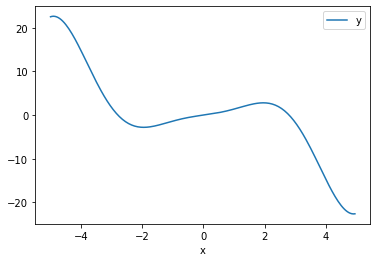

In [108]:
# We start by reading the data
df = pd.read_csv('../Data/data.txt', names = ['x','y'])

# Plotting the data
df.plot(x='x', y='y')
plt.show()

In [109]:
# Splitting data into 90/10 train/test datasets.
X_train, X_test, y_train, y_test = train_test_split(df.x, df.y, test_size=0.20, random_state=99)
df_train, df_test = train_test_split(df, test_size=0.20, random_state=99)

In [110]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        self.relu = torch.nn.ReLU() # instead of Heaviside step fn
    def forward(self, x):
        output = self.fc(x)
        output = self.relu(x) # instead of Heaviside step fn
        return output

In [111]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            return output

In [112]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

In [130]:
model = Feedforward(160, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [131]:
model.train()
epoch = 20
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()
    

Epoch 0: train loss: 102.8148422241211
Epoch 1: train loss: 102.7578125
Epoch 2: train loss: 102.7536849975586
Epoch 3: train loss: 102.7536392211914
Epoch 4: train loss: 102.753662109375
Epoch 5: train loss: 102.75364685058594
Epoch 6: train loss: 102.75364685058594
Epoch 7: train loss: 102.75364685058594
Epoch 8: train loss: 102.75364685058594
Epoch 9: train loss: 102.75364685058594
Epoch 10: train loss: 102.75364685058594
Epoch 11: train loss: 102.75364685058594
Epoch 12: train loss: 102.75364685058594
Epoch 13: train loss: 102.75364685058594
Epoch 14: train loss: 102.75364685058594
Epoch 15: train loss: 102.75364685058594
Epoch 16: train loss: 102.75364685058594
Epoch 17: train loss: 102.75364685058594
Epoch 18: train loss: 102.75364685058594
Epoch 19: train loss: 102.75364685058594


In [127]:
model.eval()

Feedforward(
  (fc1): Linear(in_features=160, out_features=1, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)